In [12]:
using Pkg, Revise
Pkg.activate("../../")

using Ipaper, Ipaper.sf, ArchGDAL
using Wflow
using MakieLayers, GLMakie

  Activating project at `D:\GitHub\jl-pkgs\Ipaper.jl`


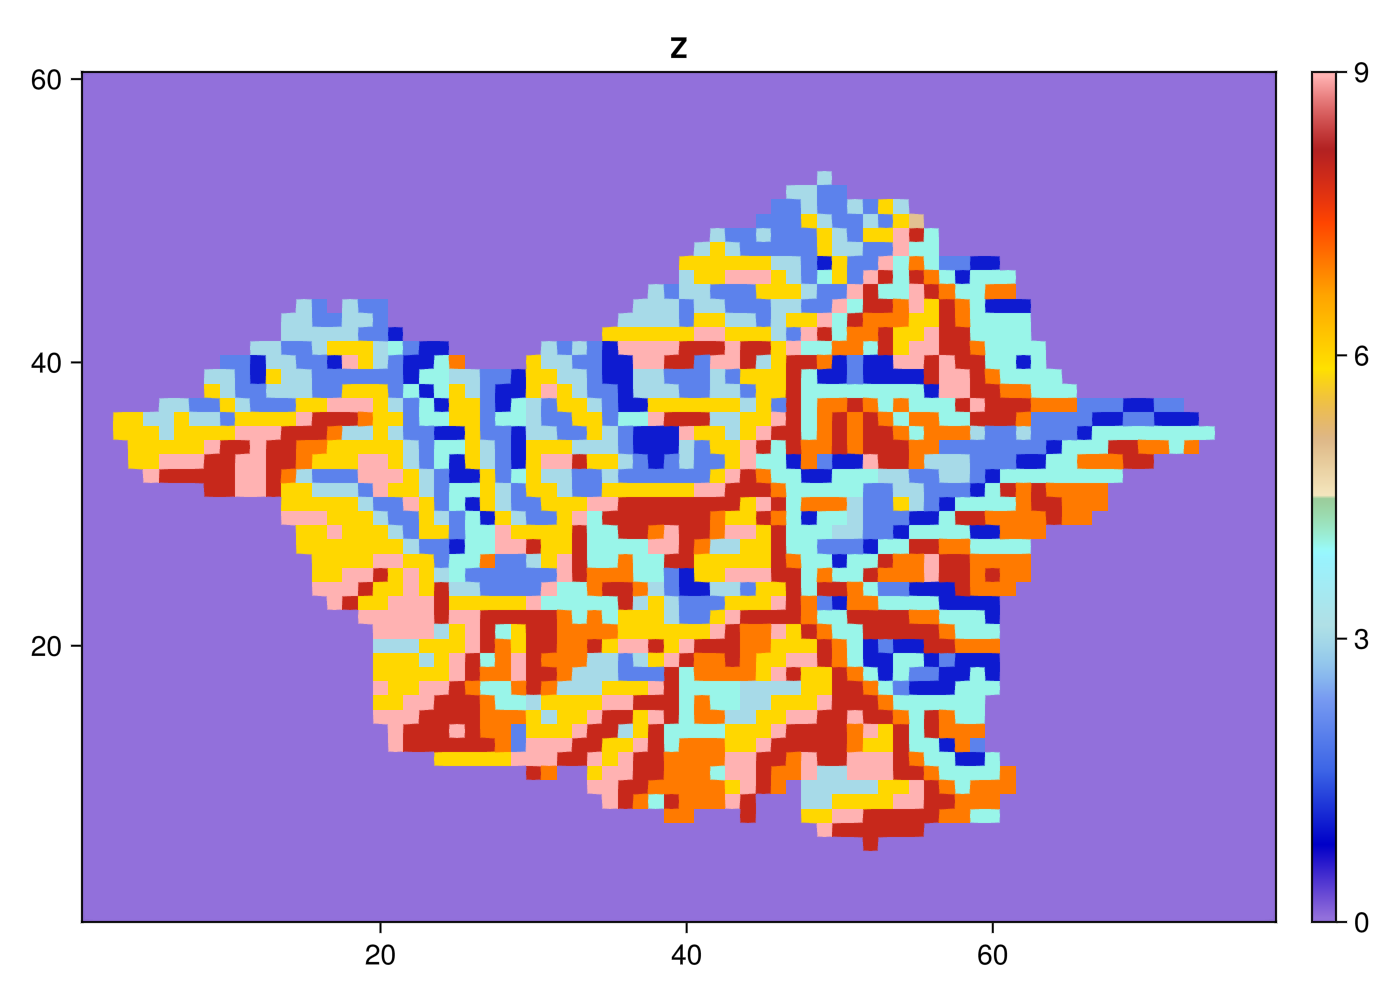

In [13]:
f = "./data/GuanShan_flwdir.tif"
# A_gis = read_gdal(f)[:, end:-1:1] # 修正颠倒的lat
# A = gis2wflow(A_gis) # replace missing value with 0
# nodata = gdal_nodata(f)[1]
# replace!(A, nodata => 0) # nodata: 255
# A
A = read_flowdir_wflow(f)

# `imagesc(A)` should looks normal
fig = Figure(; size=(700 * 1, 500))
imagesc!(fig[1, 1], A, title="Z");
fig

  0.001698 seconds (10.46 k allocations: 1.091 MiB)


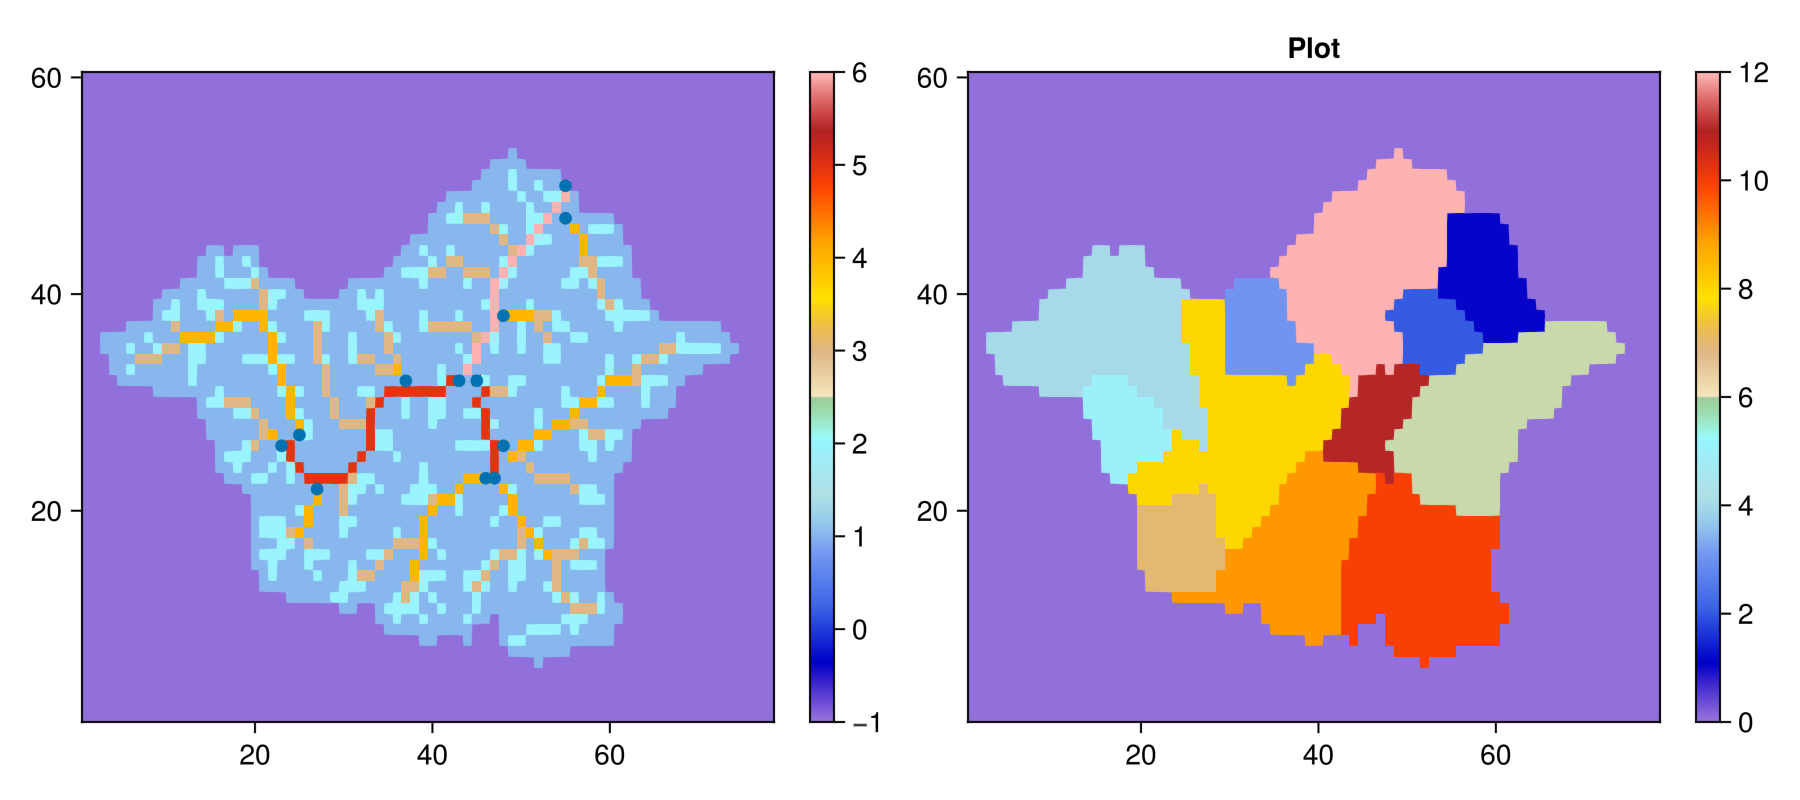

In [17]:
@time strord_2d, links_2d, basinId_2d = SubBasins(A; min_sto=4)

points = findall(x -> !(x in [0, mv]), links_2d) # CartesianIndex, index
function CartesianIndex2XY(inds)
    xs = map(p -> p[1], points)
    ys = map(p -> p[2], points)
    xs, ys    
end
xs, ys = CartesianIndex2XY(points)

fig = Figure(; size=(900, 400))
ax, plt = imagesc!(fig[1, 1], strord_2d, force_show_legend=true; title="") # stream_order passed
scatter!(ax, xs, ys; colormap=:thermal) # colormap not work
imagesc!(fig[1, 2], basinId_2d)
fig

## 图信息

In [ ]:
using Graphs, Karnak, NetworkLayout
using Colors
# g = barabasi_albert(60, 1)
g = graph
@drawsvg begin
    background("black")
    sethue("grey40")
    fontsize(8)
    drawgraph(g,
        layout=stress,
        vertexlabels=1:nv(g),
        vertexfillcolors=
        [RGB(rand(3) / 2...)
         for i in 1:nv(g)]
    )
end 600 400